<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-January/blob/main/Linear%20Regression/Implementing_Linear_Regression_from_scratch_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression:

**Y = mX + c**

Y --> Dependent Variable

X --> Independent Variable

m --> weight

c --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

Importing the Dependencies

In [88]:
# Importing numpy library
import numpy as np

**Linear Regression**

In [97]:
class Linear_Regression():

   def __init__( self, learning_rate, no_of_iterations ) :
          
        self.learning_rate = learning_rate
          
        self.no_of_iterations = no_of_iterations

    # fit function to train the model

   def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # initiating the weight and bias
          
        self.w = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y


        # implementing Gradient Descent for Optimization
                  
        for i in range( self.no_of_iterations ) :
              
            self.update_weights()
              
        
      
    # function to update weights in gradient descent
      
   def update_weights( self ) :
             
        Y_prediction = self.predict( self.X )
          
        # calculate gradients  
      
        dw = - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m
       
        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m 
          
        # updating the weights
      
        self.w = self.w - self.learning_rate * dw
      
        self.b = self.b - self.learning_rate * db
          
      
    # Line function for prediction:
      
   def predict( self, X ) :
      
        return X.dot( self.w ) + self.b


Using Linear Regression model for Prediction

In [98]:
# importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Pre-Processing

In [99]:
# loading the data from csv file to a pandas dataframe

salary_data = pd.read_csv('/content/drive/MyDrive/salary_data.csv')

In [100]:
# printing the first 5 columns of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [101]:
# last 5 rows of the dataframe
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [102]:
# number of rows & columns in the dataframe
salary_data.shape

(30, 2)

In [103]:
# checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting the feature & target

In [104]:
X = salary_data[['YearsExperience']]      
Y = salary_data['Salary']

In [105]:
print(X)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [106]:
print(Y)

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64


Splitting the dataset into training & test data

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)

Training the Linear Regression model

In [108]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations=1000)

In [109]:
model.fit(X_train, Y_train)

In [110]:
# printing the parameter values ( weights & bias)

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9514.400999035135
bias =  23697.406507136307


Predict the salary value for test data

In [111]:
test_data_prediction = model.predict(X_test)

In [112]:
print(test_data_prediction)

1      36066.127806
0      34163.247606
14     66512.211003
9      58900.690204
21     91249.653600
19     80783.812501
23    101715.494699
6      52240.609504
3      42726.208505
20     88395.333301
dtype: float64


Visualizing the predicted values & actual Values

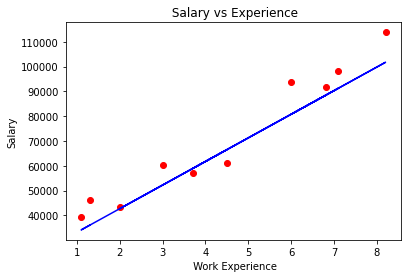

In [113]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()